# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
diabetic_df = pd.read_csv('../data/diabetic_data_cleaned_1.csv', low_memory=False)

In [3]:
diabetic_df.head()

,encounter_id,patient_nbr,race,gender,age,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,admission_type,discharge_disposition,admission_source
0,149190,55629189,Caucasian,Female,10-20,3,missing,59,0,18,...,No,No,No,No,Ch,Yes,>30,Emergency,Discharged to home,Emergency Room
1,64410,86047875,AfricanAmerican,Female,20-30,2,missing,11,5,13,...,No,No,No,No,No,Yes,NO,Emergency,Discharged to home,Emergency Room
2,500364,82442376,Caucasian,Male,30-40,2,missing,44,1,16,...,No,No,No,No,Ch,Yes,NO,Emergency,Discharged to home,Emergency Room
3,16680,42519267,Caucasian,Male,40-50,1,missing,51,0,8,...,No,No,No,No,Ch,Yes,NO,Emergency,Discharged to home,Emergency Room
4,63768,114882984,Caucasian,Male,70-80,5,missing,73,0,12,...,No,No,No,No,No,Yes,>30,Emergency,Discharged to home,Emergency Room


In [4]:
print('Data set dimensions :', diabetic_df.shape)
print(diabetic_df.info())

Data set dimensions : (100241, 48)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100241 entries, 0 to 100240
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              100241 non-null  int64 
 1   patient_nbr               100241 non-null  int64 
 2   race                      100241 non-null  object
 3   gender                    100241 non-null  object
 4   age                       100241 non-null  object
 5   time_in_hospital          100241 non-null  int64 
 6   medical_specialty         100241 non-null  object
 7   num_lab_procedures        100241 non-null  int64 
 8   num_procedures            100241 non-null  int64 
 9   num_medications           100241 non-null  int64 
 10  number_outpatient         100241 non-null  int64 
 11  number_emergency          100241 non-null  int64 
 12  number_inpatient          100241 non-null  int64 
 13  diag_1                  

### Explore the data

In [6]:
diabetic_df.describe().T

,count,mean,std,min,25%,50%,75%,max
encounter_id,100241.0,1.660164e+08,1.026763e+08,12522.0,85566204.0,153048924.0,231062436.0,443867222.0
patient_nbr,100241.0,5.462896e+07,3.869475e+07,135.0,23460894.0,46049076.0,87785298.0,189502619.0
time_in_hospital,100241.0,4.420307e+00,2.991258e+00,1.0,2.0,4.0,6.0,14.0
num_lab_procedures,100241.0,4.317399e+01,1.969134e+01,1.0,32.0,44.0,57.0,132.0
num_procedures,100241.0,1.350236e+00,1.710899e+00,0.0,0.0,1.0,2.0,6.0
num_medications,100241.0,1.611782e+01,8.116446e+00,1.0,11.0,15.0,20.0,81.0
number_outpatient,100241.0,3.725721e-01,1.274092e+00,0.0,0.0,0.0,0.0,42.0
number_emergency,100241.0,1.990204e-01,9.335544e-01,0.0,0.0,0.0,0.0,76.0
number_inpatient,100241.0,6.394888e-01,1.262787e+00,0.0,0.0,0.0,1.0,21.0
number_diagnoses,100241.0,7.497052e+00,1.839509e+00,3.0,6.0,8.0,9.0,16.0


In [7]:
diabetic_df.describe(exclude=np.number).T

,count,unique,top,freq
race,100241,6,Caucasian,75079
gender,100241,2,Female,53922
age,100241,10,70-80,25896
medical_specialty,100241,73,missing,49480
diag_1,100241,715,428,6853
diag_2,100241,743,428,6657
diag_3,100241,789,250,11533
max_glu_serum,100241,4,None,94978
A1Cresult,100241,4,None,83642
metformin,100241,4,No,80541


### Numerical Variables

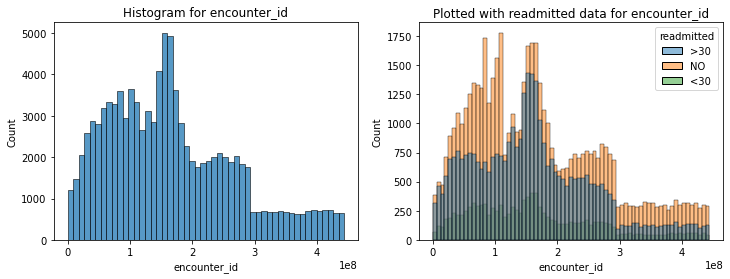

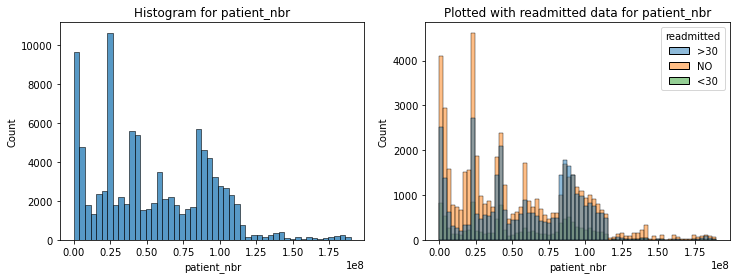

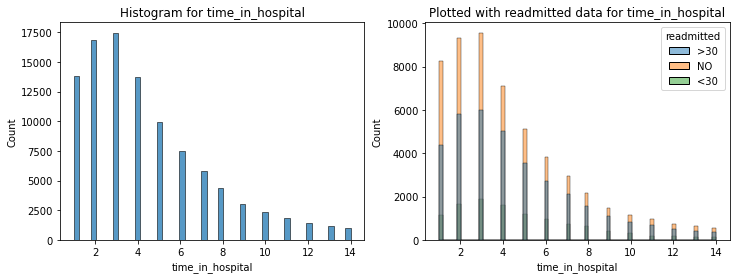

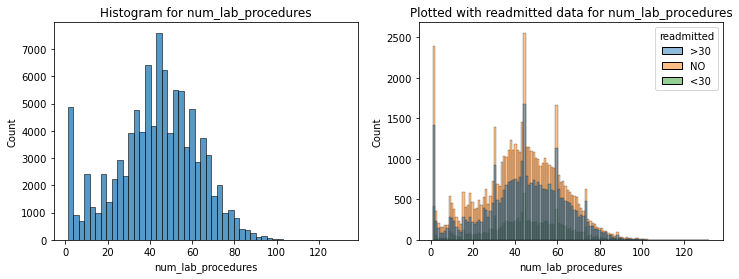

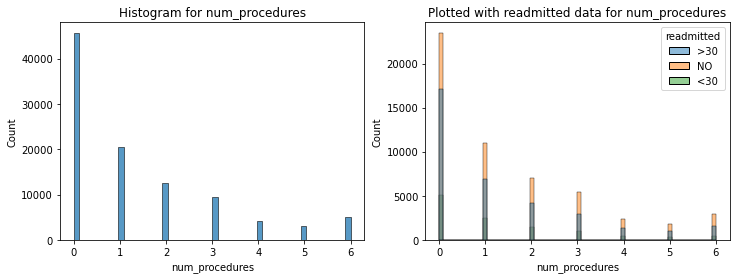

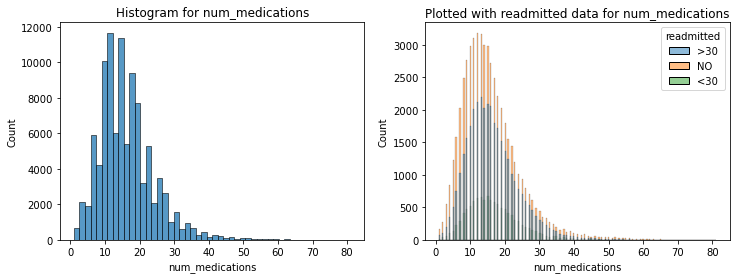

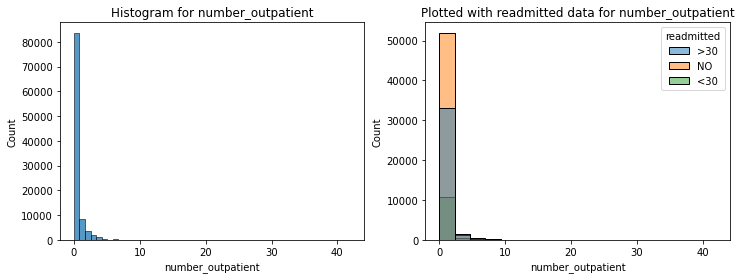

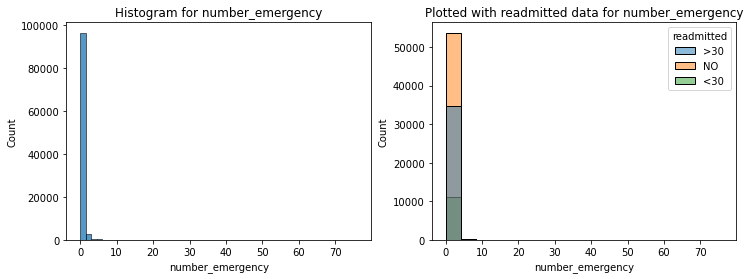

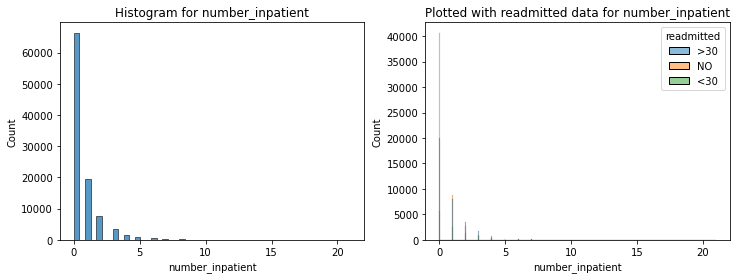

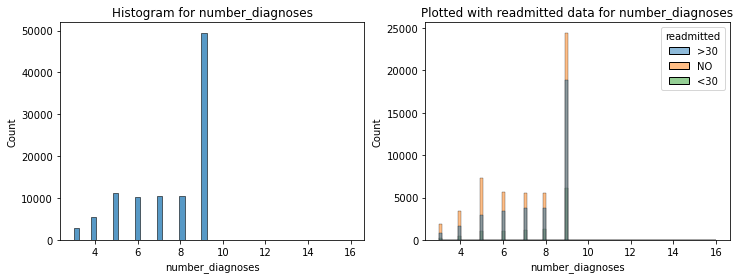

In [8]:
# Create list of numerical column names
numerical = list(diabetic_df.select_dtypes(include='number').columns)

for var in numerical:
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(x=var, bins=50, data=diabetic_df ,ax=ax[0])
    ax[0].set_title(f"Histogram for {var}")
    
    sns.histplot(x=var, hue='readmitted', data=diabetic_df, ax=ax[1], alpha=0.5)  
    ax[1].set_title(f"Plotted with readmitted data for {var}")

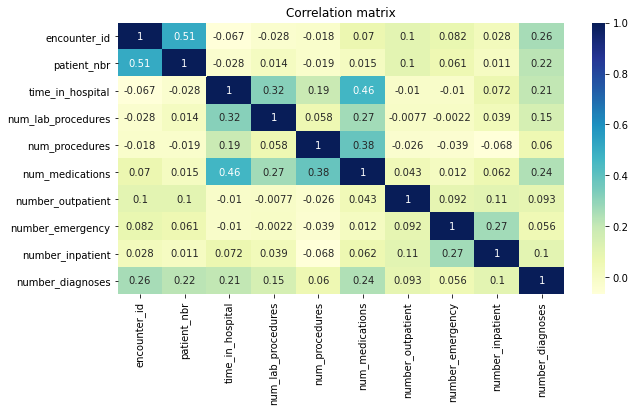

In [9]:
plt.figure(figsize=(10, 5))
sns.heatmap(diabetic_df.corr(), annot=True, cmap='YlGnBu')
plt.title("Correlation matrix");

### Observations from numerical variables
The following two variables can be removed as they do not contribute to the target variable:
 - encounter_id - Unique number for hospital admissions
 - patient_nbr - Unique number for patient
 
 Grouping following variables:
  - time_in_hospital
  - num_procedures
  - num_medications
  - number_outpatient
  - number_emergency
  - number_inpatient
  - number_diagnoses

#### variable - time_in_hospital
Number of days between admission and discharge

In [10]:
diabetic_df['time_in_hospital'].value_counts()

3     17444
2     16808
1     13791
4     13744
5      9899
6      7490
7      5831
8      4369
9      2989
10     2338
11     1847
12     1445
13     1205
14     1041
Name: time_in_hospital, dtype: int64

In [11]:
# Grouping time_in_hospital to days(1-3), (4-6), (7-9), (greater than 10)
bins = [0, 3, 6, 9, 14]
labels =['3 days','6 days','9 days', '14 days']
diabetic_df['time_in_hospital_binned'] = pd.cut(diabetic_df['time_in_hospital'], bins,labels=labels)

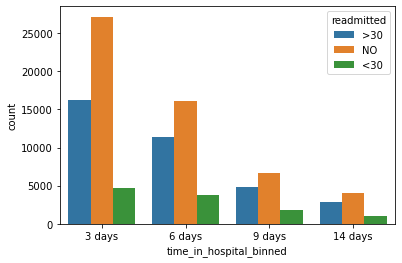

In [12]:
sns.countplot(x='time_in_hospital_binned', hue='readmitted', data=diabetic_df);

#### variable - num_medications
Number of medications administered during time in hospital

In [13]:
diabetic_df['num_medications'].value_counts()

13    6038
12    5951
15    5750
11    5719
14    5647
      ... 
70       2
75       2
74       1
79       1
81       1
Name: num_medications, Length: 75, dtype: int64

In [14]:
#Grouping num_medications
bins = [0, 10, 20, 30, 81]
labels =['upto 10','upto 20','upto 30', 'more than 30']
diabetic_df['num_medications_binned'] = pd.cut(diabetic_df['num_medications'], bins,labels=labels)

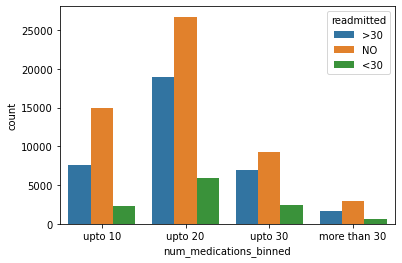

In [15]:
sns.countplot(x='num_medications_binned', hue='readmitted', data=diabetic_df);

#### variable - num_procedures
Number of procedures performed for the patient

In [16]:
diabetic_df['num_procedures'].value_counts()

0    45680
1    20414
2    12607
3     9381
6     4940
4     4157
5     3062
Name: num_procedures, dtype: int64

In [17]:
bins = [-np.inf, 0, 3, 6]
labels =['zero','upto 3','upto 6']
diabetic_df['num_procedures_binned'] = pd.cut(diabetic_df['num_procedures'], bins,labels=labels)

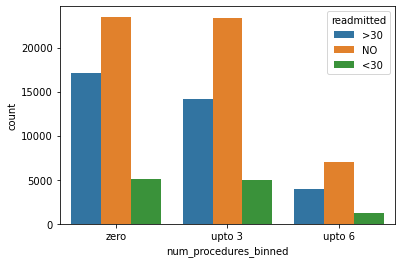

In [18]:
sns.countplot(x='num_procedures_binned', hue='readmitted', data=diabetic_df);

#### variable - number_diagnoses
Number of diagnoses

In [19]:
print(diabetic_df['number_diagnoses'].max())
diabetic_df['number_diagnoses'].value_counts()

16


9     49466
5     11262
8     10562
7     10374
6     10144
4      5501
3      2817
16       45
10       17
13       16
11       11
15       10
12        9
14        7
Name: number_diagnoses, dtype: int64

In [20]:
bins = [2, 4, 8, 9, 16]
labels =['upto 4', 'upto 8', 'upto 9', 'upto 16']
diabetic_df['number_diagnoses_binned'] = pd.cut(diabetic_df['number_diagnoses'], bins,labels=labels)

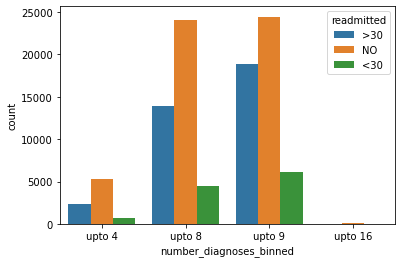

In [21]:
sns.countplot(x='number_diagnoses_binned', hue='readmitted', data=diabetic_df);

#### variable - number_outpatient
Number of outpatient visits of the patient in the year preceding the encounter

In [22]:
diabetic_df['number_outpatient'].value_counts()

0     83629
1      8478
2      3565
3      2026
4      1094
5       529
6       301
7       153
8        98
9        83
10       57
11       42
13       31
12       30
14       28
15       20
16       15
17        8
21        7
20        7
22        5
18        5
19        3
24        3
27        3
29        2
25        2
35        2
23        2
33        2
26        2
36        2
40        1
38        1
37        1
28        1
42        1
39        1
34        1
Name: number_outpatient, dtype: int64

In [23]:
bins = [-np.inf, 0, diabetic_df['number_outpatient'].max()]
labels =['zero', 'more than zero']
diabetic_df['number_outpatient_binned'] = pd.cut(diabetic_df['number_outpatient'], bins,labels=labels)

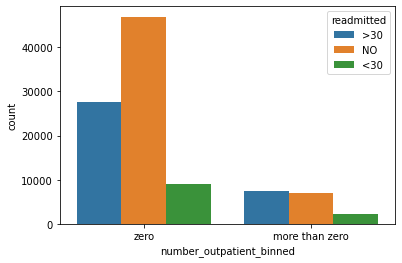

In [24]:
sns.countplot(x='number_outpatient_binned', hue='readmitted', data=diabetic_df);

#### variable - number_emergency
Number of emergency visits of the patient in the year preceding the encounter

In [25]:
diabetic_df['number_emergency'].value_counts()

0     88955
1      7612
2      2026
3       718
4       372
5       190
6        93
7        72
8        50
10       34
9        32
11       22
13       12
12       10
22        6
18        5
16        5
19        4
20        4
15        3
21        2
25        2
14        2
24        1
54        1
63        1
28        1
64        1
46        1
29        1
37        1
42        1
76        1
Name: number_emergency, dtype: int64

In [26]:
bins = [-np.inf, 0, diabetic_df['number_emergency'].max()]
labels =['zero', 'more than zero']
diabetic_df['number_emergency_binned'] = pd.cut(diabetic_df['number_emergency'], bins,labels=labels)

In [27]:
diabetic_df['number_emergency_binned'].value_counts()

zero              88955
more than zero    11286
Name: number_emergency_binned, dtype: int64

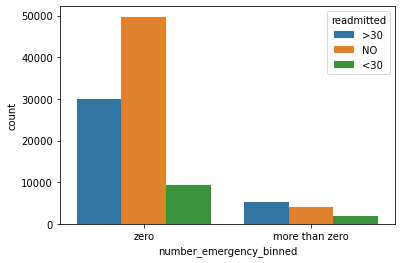

In [28]:
sns.countplot(x='number_emergency_binned', hue='readmitted', data=diabetic_df);

#### variable - number_inpatient
Number of inpatient visits of the patient in the year preceding the encounter

In [29]:
diabetic_df['number_inpatient'].value_counts()

0     66380
1     19362
2      7511
3      3382
4      1612
5       807
6       474
7       266
8       148
9       111
10       60
11       48
12       33
13       20
14       10
15        8
16        5
19        2
18        1
21        1
Name: number_inpatient, dtype: int64

In [30]:
bins = [-np.inf, 0, diabetic_df['number_inpatient'].max()]
labels =['zero', 'more than zero']
diabetic_df['number_inpatient_binned'] = pd.cut(diabetic_df['number_inpatient'], bins,labels=labels)

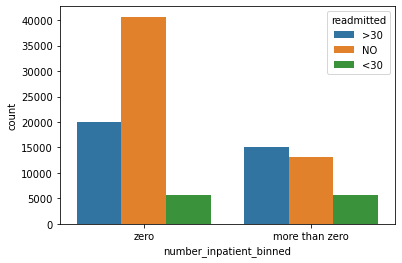

In [31]:
sns.countplot(x='number_inpatient_binned', hue='readmitted', data=diabetic_df);

In [32]:
# make copy of the dataset
diabetic_df_copy1 = diabetic_df.copy()

In [33]:
# drop columns
cols_to_remove = ['encounter_id','patient_nbr','time_in_hospital', 'num_procedures', 'num_medications', 'number_outpatient','number_emergency', 'number_inpatient', 'number_diagnoses']
diabetic_df_copy1.drop(cols_to_remove, axis=1,inplace=True)

### Categorical Variables

In [35]:
import warnings
warnings.filterwarnings("ignore")

# Import package for predictive power score matrix
import ppscore as pps

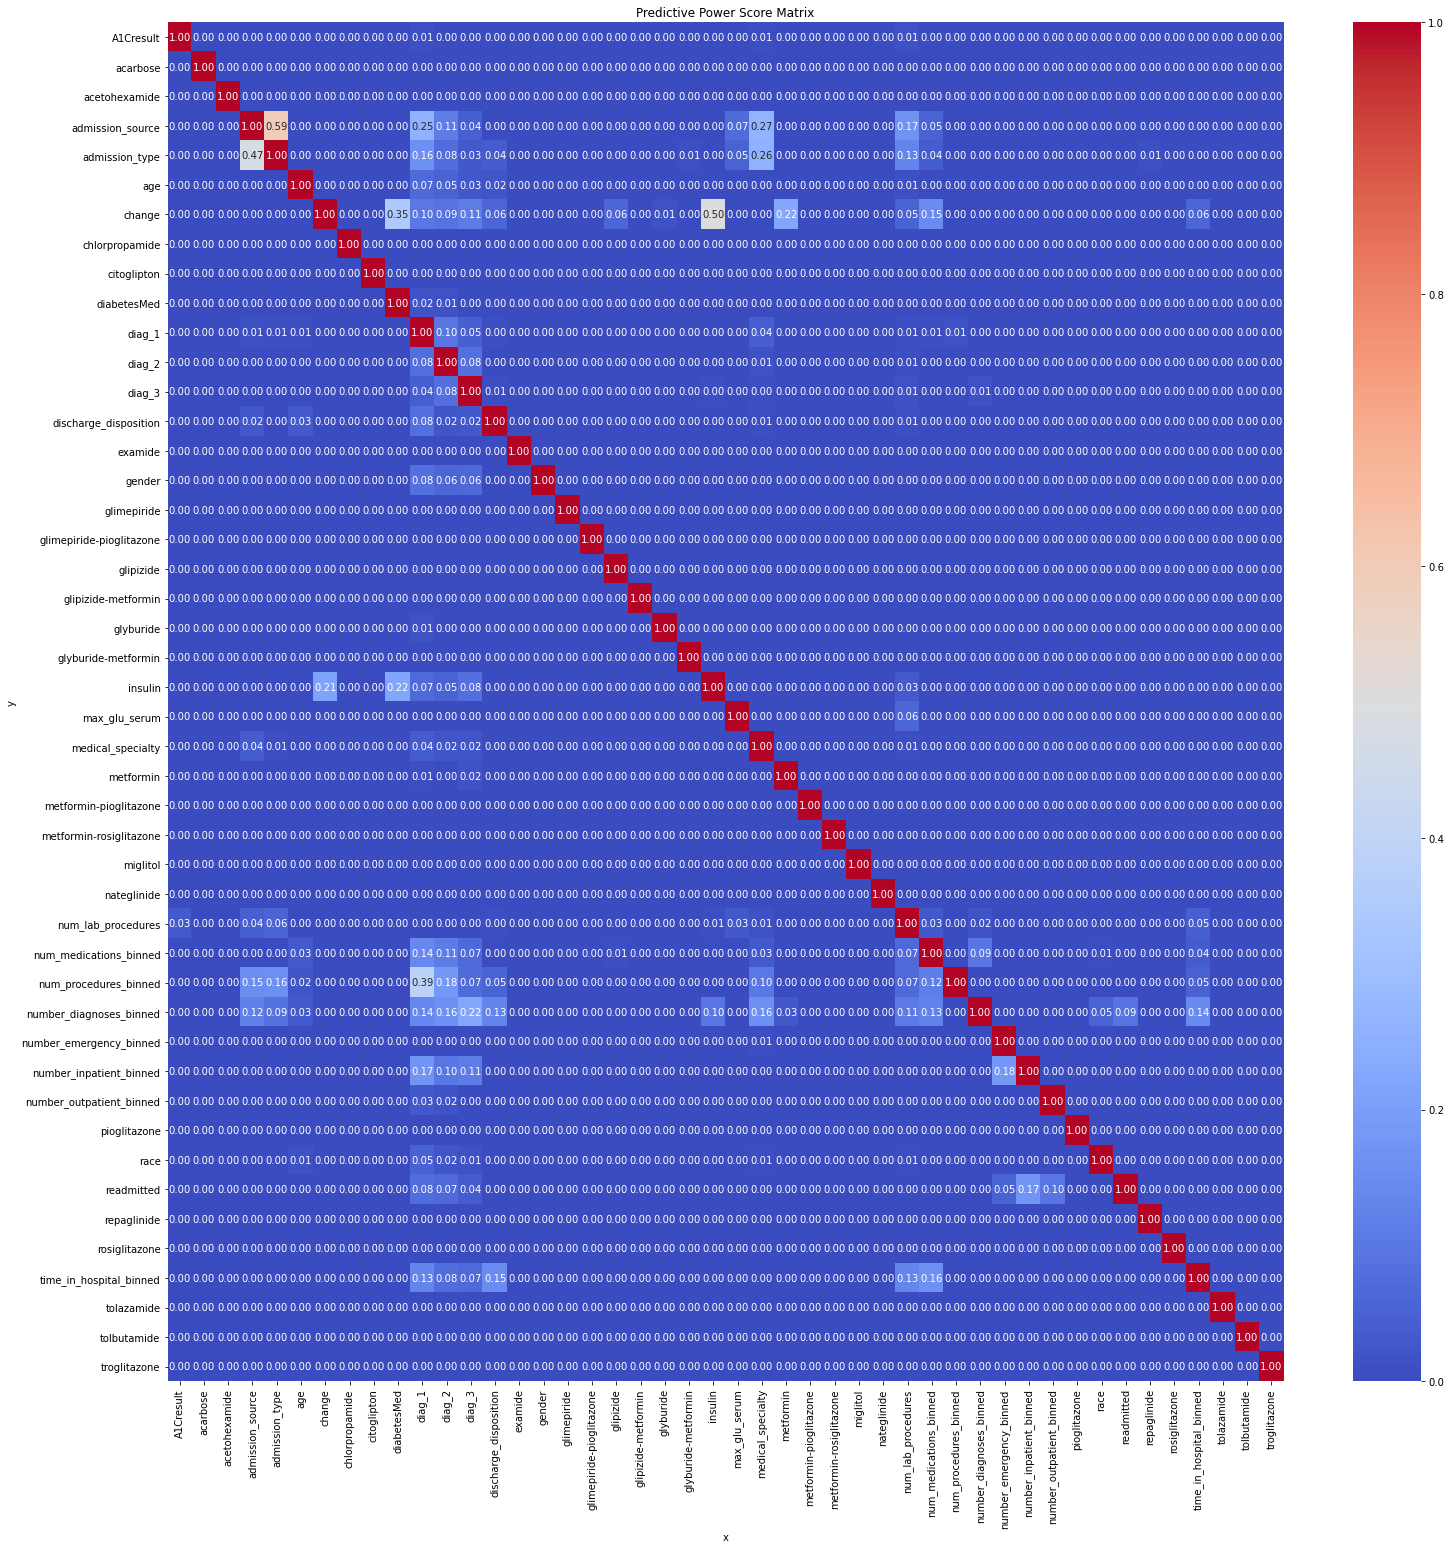

In [36]:
# Plot
plt.figure(figsize=(25, 25))
matrix_df = pps.matrix(diabetic_df_copy1).pivot(columns='x', index='y',  values='ppscore')
sns.heatmap(matrix_df, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Predictive Power Score Matrix");

### Observations

1. admission_source and admission_type are corelated (0.59), so can drop admission_source
2. change and insulin are corelated(0.50), so can drop change
3. diag_1 and num_procedures are related (0.39) so dropping diag_1
4. dropping diag_2 and diag_3 as its has unique values that are over 700 and features are represented by ICD-9 codes. (Will need industry knowledge to decode these values)

#### Variables - race, gender, age

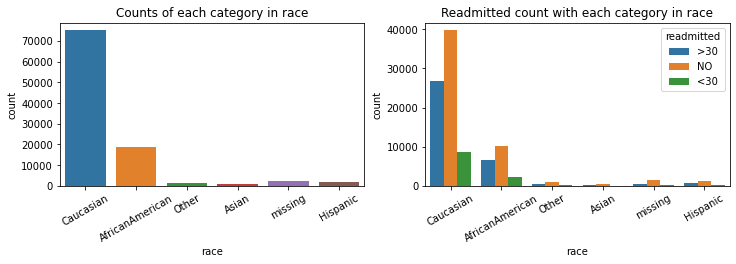

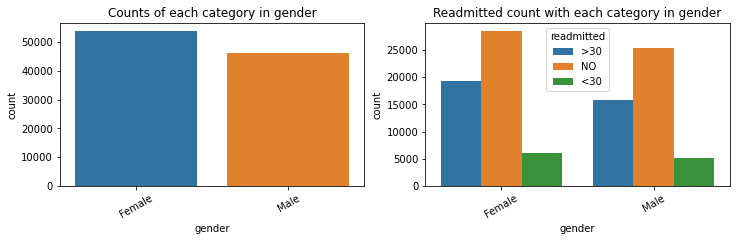

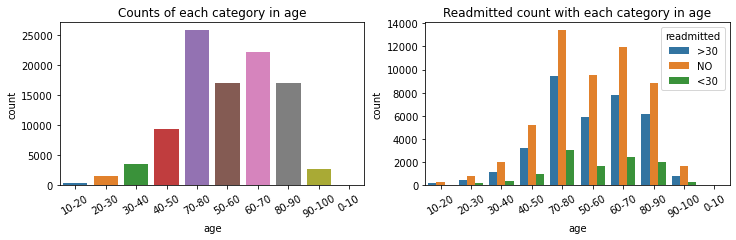

In [37]:
category1 = ['race', 'gender', 'age']
for var in category1:
    fig, ax = plt.subplots(1, 2, figsize=(12, 3))    
    sns.countplot(x=var, data=diabetic_df_copy1, ax=ax[0])
    ax[0].set_title(f"Counts of each category in {var}")
    ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation = 30)
    
    sns.countplot(x=var, hue = 'readmitted', data=diabetic_df_copy1, ax=ax[1])
    ax[1].set_title(f"Readmitted count with each category in {var}")
    ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation = 30);
   

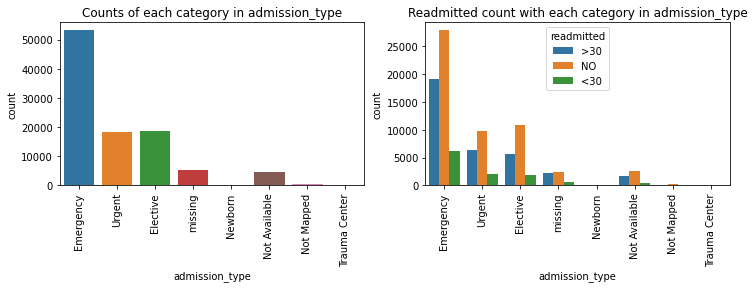

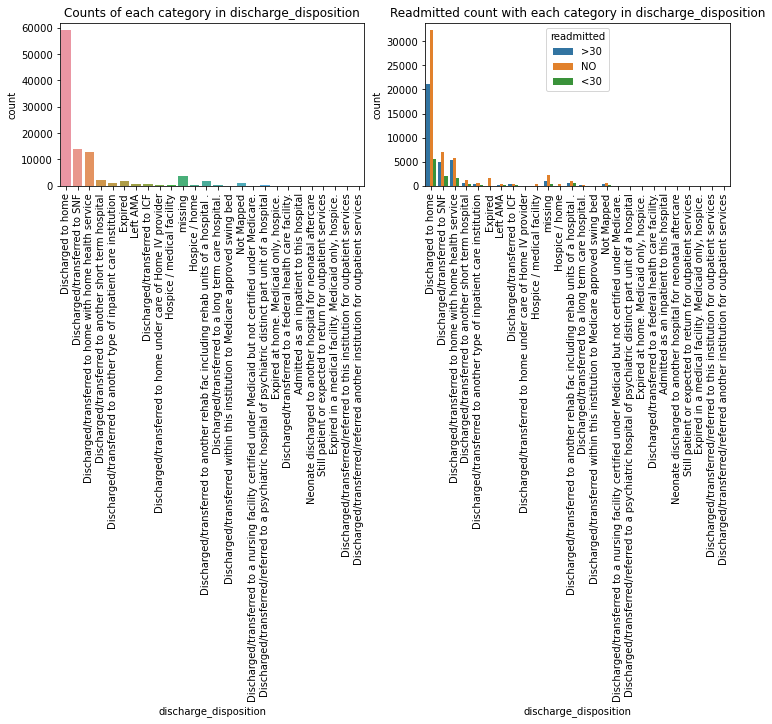

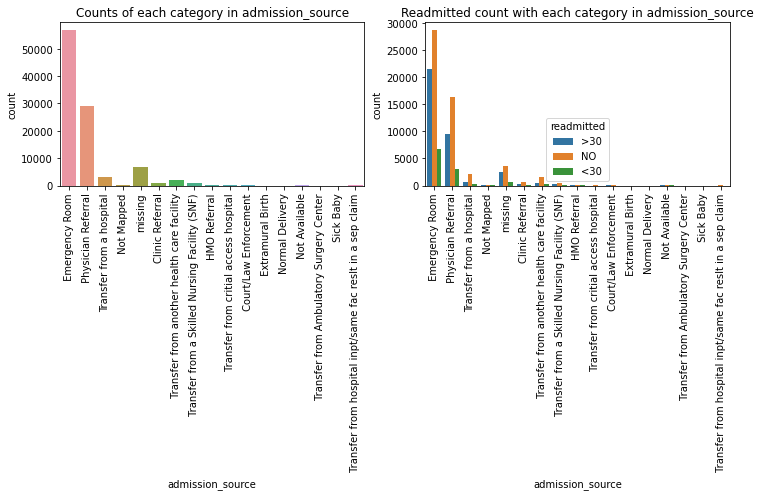

In [38]:
category2 = ['admission_type', 'discharge_disposition', 'admission_source']
for var in category2:
    fig, ax = plt.subplots(1, 2, figsize=(12, 3))    
    sns.countplot(x=var, data=diabetic_df_copy1, ax=ax[0])
    ax[0].set_title(f"Counts of each category in {var}")
    ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation = 90)
    
    sns.countplot(x=var, hue = 'readmitted', data=diabetic_df_copy1, ax=ax[1])
    ax[1].set_title(f"Readmitted count with each category in {var}")
    ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation = 90);
   

#### variable - admission_type

In [39]:
diabetic_df_copy1['admission_type'].value_counts()

Emergency        53230
Elective         18544
Urgent           18203
missing           5199
Not Available     4719
Not Mapped         315
Trauma Center       21
Newborn             10
Name: admission_type, dtype: int64

In [40]:
common_admission_type = ['Emergency','Elective', 'Urgent']
diabetic_df_copy1['new_admission_type'] = diabetic_df_copy1['admission_type'].copy()

#replace all admission_type not in common_admission_type with 'Other' category
diabetic_df_copy1.loc[~diabetic_df_copy1.new_admission_type.isin(common_admission_type),'new_admission_type'] = 'Other'

In [41]:
diabetic_df_copy1['new_admission_type'].value_counts()

Emergency    53230
Elective     18544
Urgent       18203
Other        10264
Name: new_admission_type, dtype: int64

#### variable - discharge_disposition
Discharge Disposition refers where the patient was discharge to after treatment

In [42]:
diabetic_df_copy1['discharge_disposition'].value_counts()

Discharged to home                                                                                           59003
Discharged/transferred to SNF                                                                                13897
Discharged/transferred to home with home health service                                                      12830
missing                                                                                                       3642
Discharged/transferred to another short term hospital                                                         2115
Discharged/transferred to another rehab fac including rehab units of a hospital .                             1981
Expired                                                                                                       1640
Discharged/transferred to another type of inpatient care institution                                          1167
Not Mapped                                                                      

In [43]:
common_discharge_disposition = ['Discharged to home', 'Discharged/transferred to SNF', 'Discharged/transferred to home with home health service']

diabetic_df_copy1['new_discharge_disposition'] = diabetic_df_copy1['discharge_disposition'].copy()

#replace all admission_type not in common_admission_type with 'Other' category
diabetic_df_copy1.loc[~diabetic_df_copy1.new_discharge_disposition.isin(common_discharge_disposition ),'new_discharge_disposition'] = 'Other'

In [44]:
diabetic_df_copy1['new_discharge_disposition'].value_counts()

Discharged to home                                         59003
Other                                                      14511
Discharged/transferred to SNF                              13897
Discharged/transferred to home with home health service    12830
Name: new_discharge_disposition, dtype: int64

In [45]:
diabetic_df_copy1.drop(['admission_type','discharge_disposition'], axis=1,inplace=True)

#### variable - medical_specialty
Take the top ten and categorize the rest as 'Other'

In [46]:
diabetic_df_copy1['medical_specialty'].value_counts()

missing                             49480
InternalMedicine                    14384
Emergency/Trauma                     7496
Family/GeneralPractice               7299
Cardiology                           5320
                                    ...  
Dermatology                             1
SportsMedicine                          1
Perinatology                            1
Surgery-PlasticwithinHeadandNeck        1
Neurophysiology                         1
Name: medical_specialty, Length: 73, dtype: int64

In [47]:
top_10_specialty = ['missing','InternalMedicine', 'Emergency/Trauma','Family/GeneralPractice','Cardiology','Surgery-General','Nephrology','Orthopedics','Orthopedics-Reconstructive','Radiologist' ]

#new medical_specialty column
diabetic_df_copy1['new_medical_specialty'] = diabetic_df_copy1['medical_specialty'].copy()

#replace all specialities not in top 10 with 'Other' category
diabetic_df_copy1.loc[~diabetic_df_copy1.new_medical_specialty.isin(top_10_specialty),'new_medical_specialty'] = 'Other'

In [48]:
diabetic_df_copy1.drop('medical_specialty', axis=1,inplace=True)

#### variable - diag_1

In [49]:
diabetic_df_copy1['diag_1'].value_counts()

428    6853
414    6545
786    3977
410    3610
486    3495
       ... 
448       1
347       1
804       1
982       1
915       1
Name: diag_1, Length: 715, dtype: int64

#### variable - diag_2

In [50]:
diabetic_df_copy1['diag_2'].value_counts()

428     6657
276     6622
250     5584
427     5022
401     3705
        ... 
96         1
E968       1
192        1
E818       1
917        1
Name: diag_2, Length: 743, dtype: int64

#### variable - diag_3

In [51]:
diabetic_df_copy1['diag_3'].value_counts()

250    11533
401     8280
276     5172
428     4572
427     3949
       ...  
750        1
485        1
V22        1
370        1
193        1
Name: diag_3, Length: 789, dtype: int64

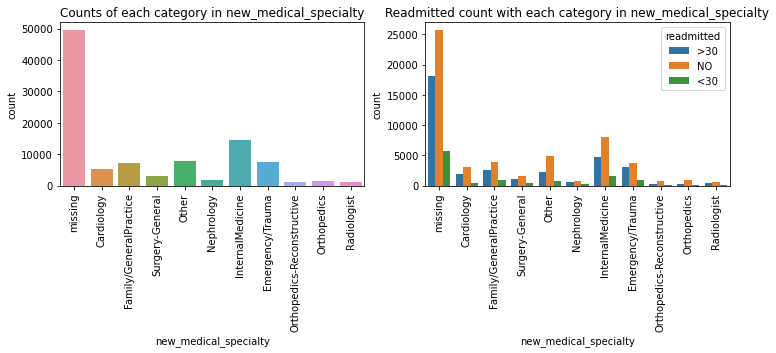

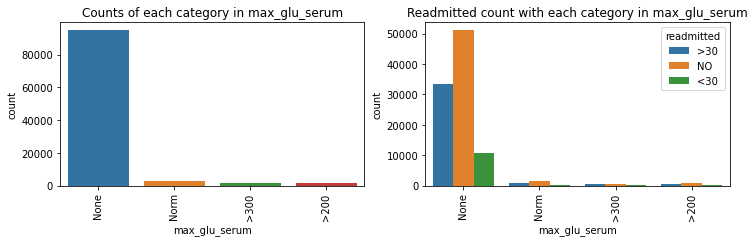

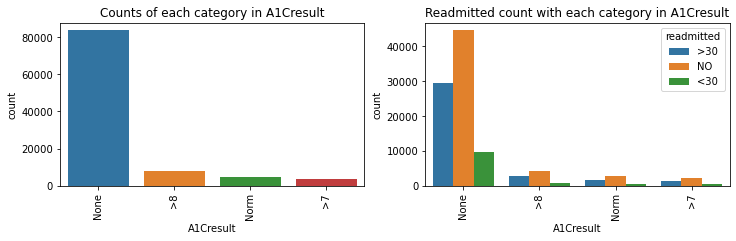

In [52]:
category3 = ['new_medical_specialty', 'max_glu_serum', 'A1Cresult']
for var in category3:
    fig, ax = plt.subplots(1, 2, figsize=(12, 3))    
    sns.countplot(x=var, data=diabetic_df_copy1, ax=ax[0])
    ax[0].set_title(f"Counts of each category in {var}")
    ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation = 90)
    
    sns.countplot(x=var, hue = 'readmitted', data=diabetic_df_copy1, ax=ax[1])
    ax[1].set_title(f"Readmitted count with each category in {var}")
    ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation = 90);

#### All prescriptions

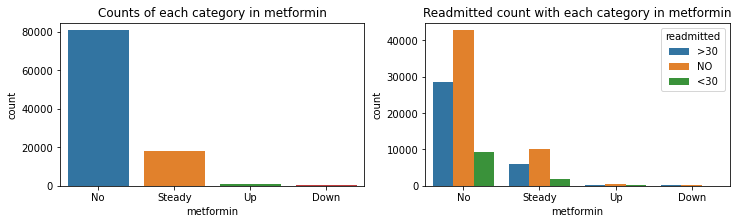

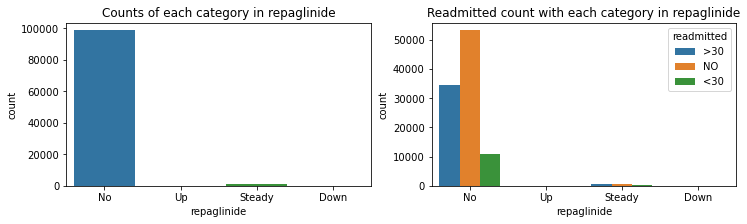

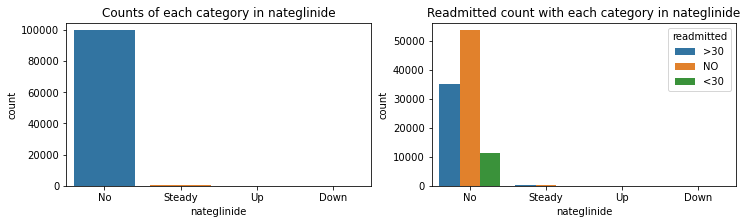

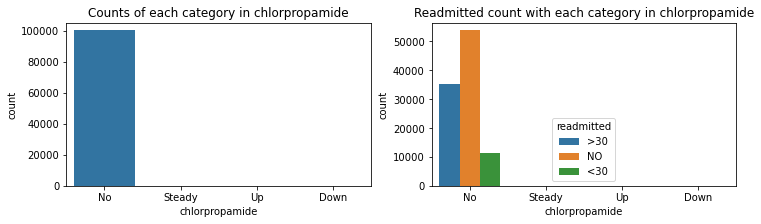

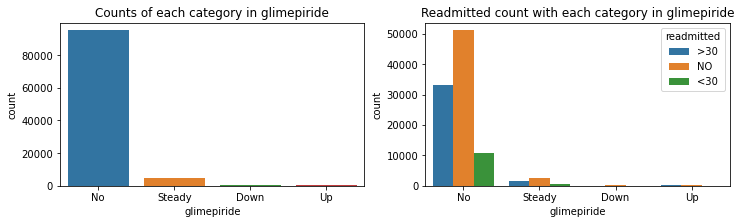

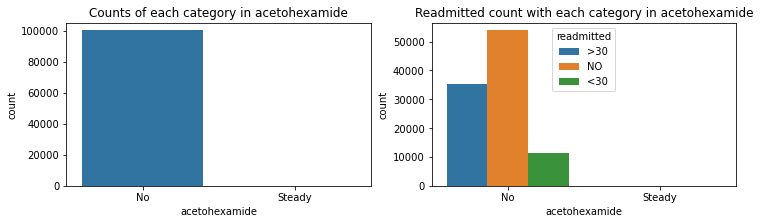

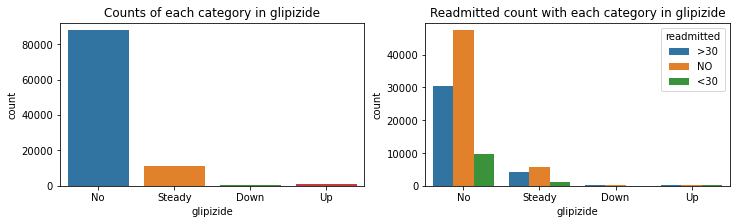

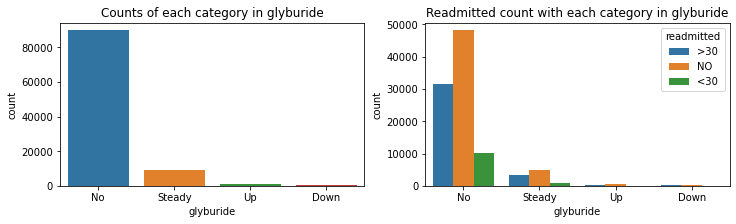

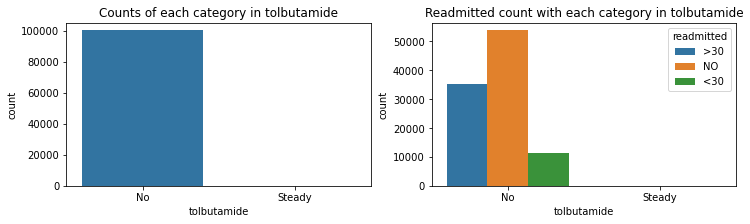

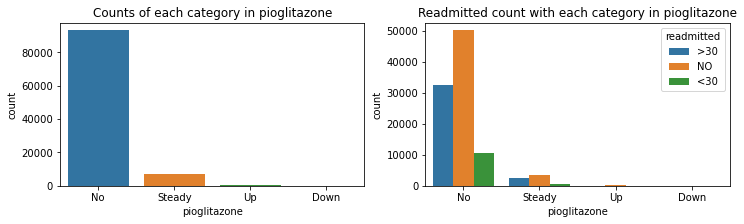

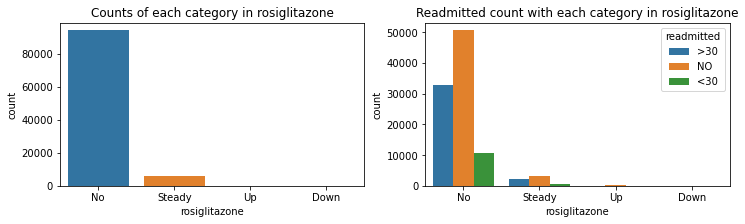

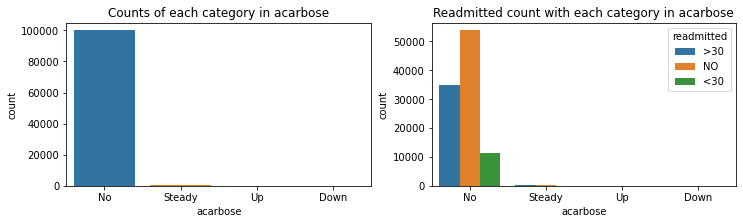

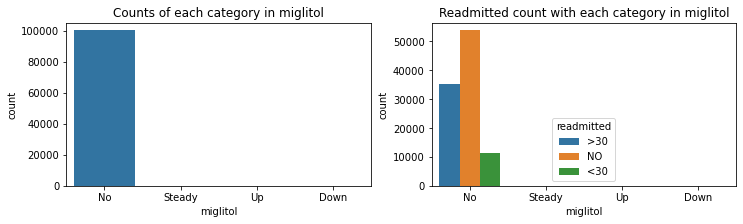

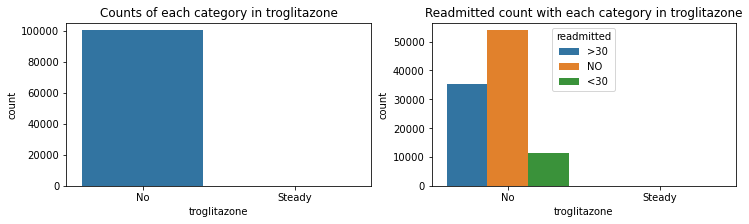

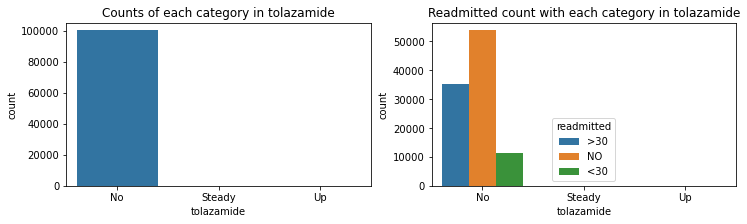

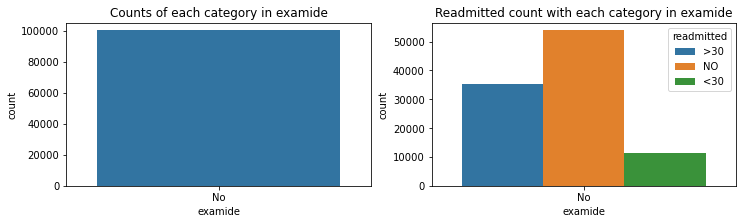

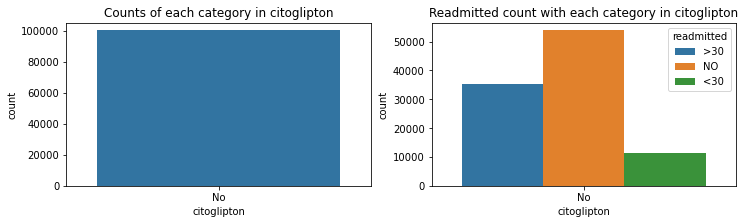

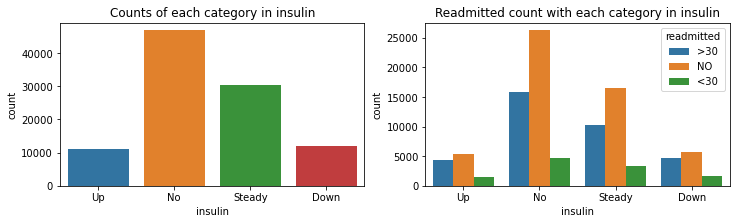

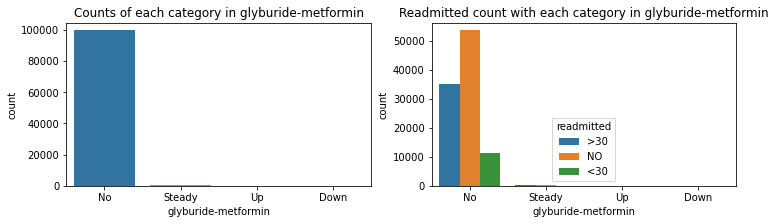

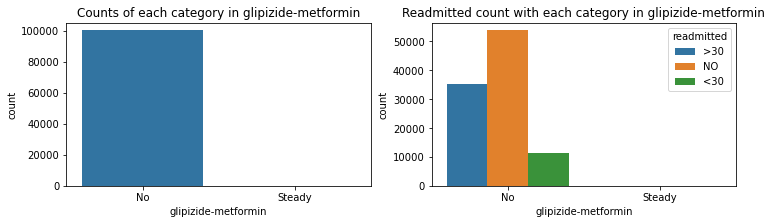

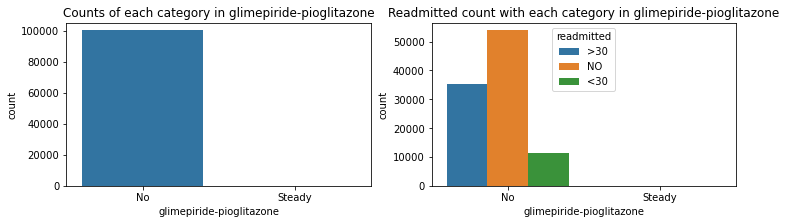

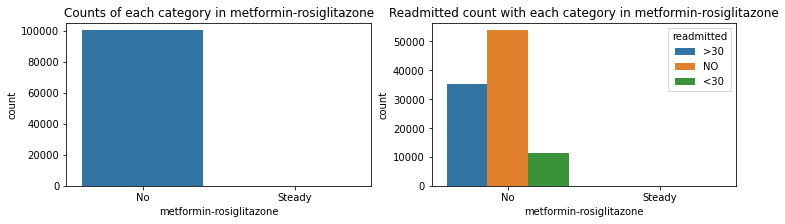

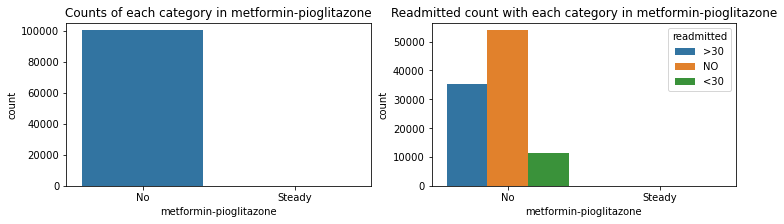

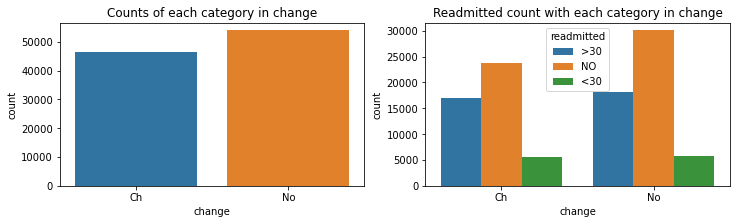

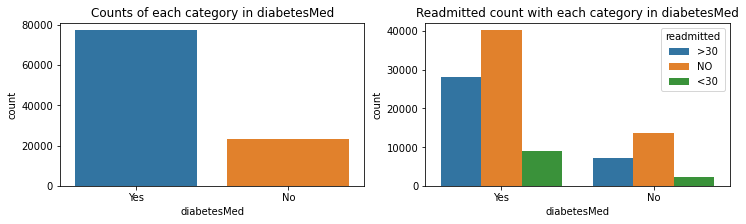

In [53]:
prescriptions = ['metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide','glipizide','glyburide','tolbutamide', 'pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton','insulin','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone','change','diabetesMed']

for var in prescriptions:
    fig, ax = plt.subplots(1, 2, figsize=(12, 3))    
    sns.countplot(x=var, data=diabetic_df_copy1, ax=ax[0])
    ax[0].set_title(f"Counts of each category in {var}")
    
    sns.countplot(x=var, hue = 'readmitted', data=diabetic_df_copy1, ax=ax[1])
    ax[1].set_title(f"Readmitted count with each category in {var}");

#### Target Variable - readmitted

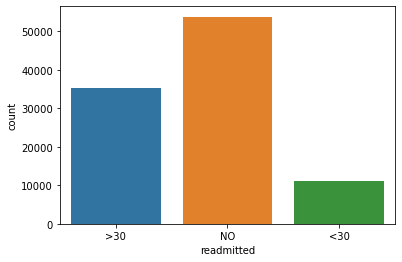

In [54]:
sns.countplot(x='readmitted', data=diabetic_df_copy1);

In [55]:
diabetic_df_copy1.drop(['admission_source', 'change', 'diag_1', 'diag_2', 'diag_3'], axis=1,inplace=True)

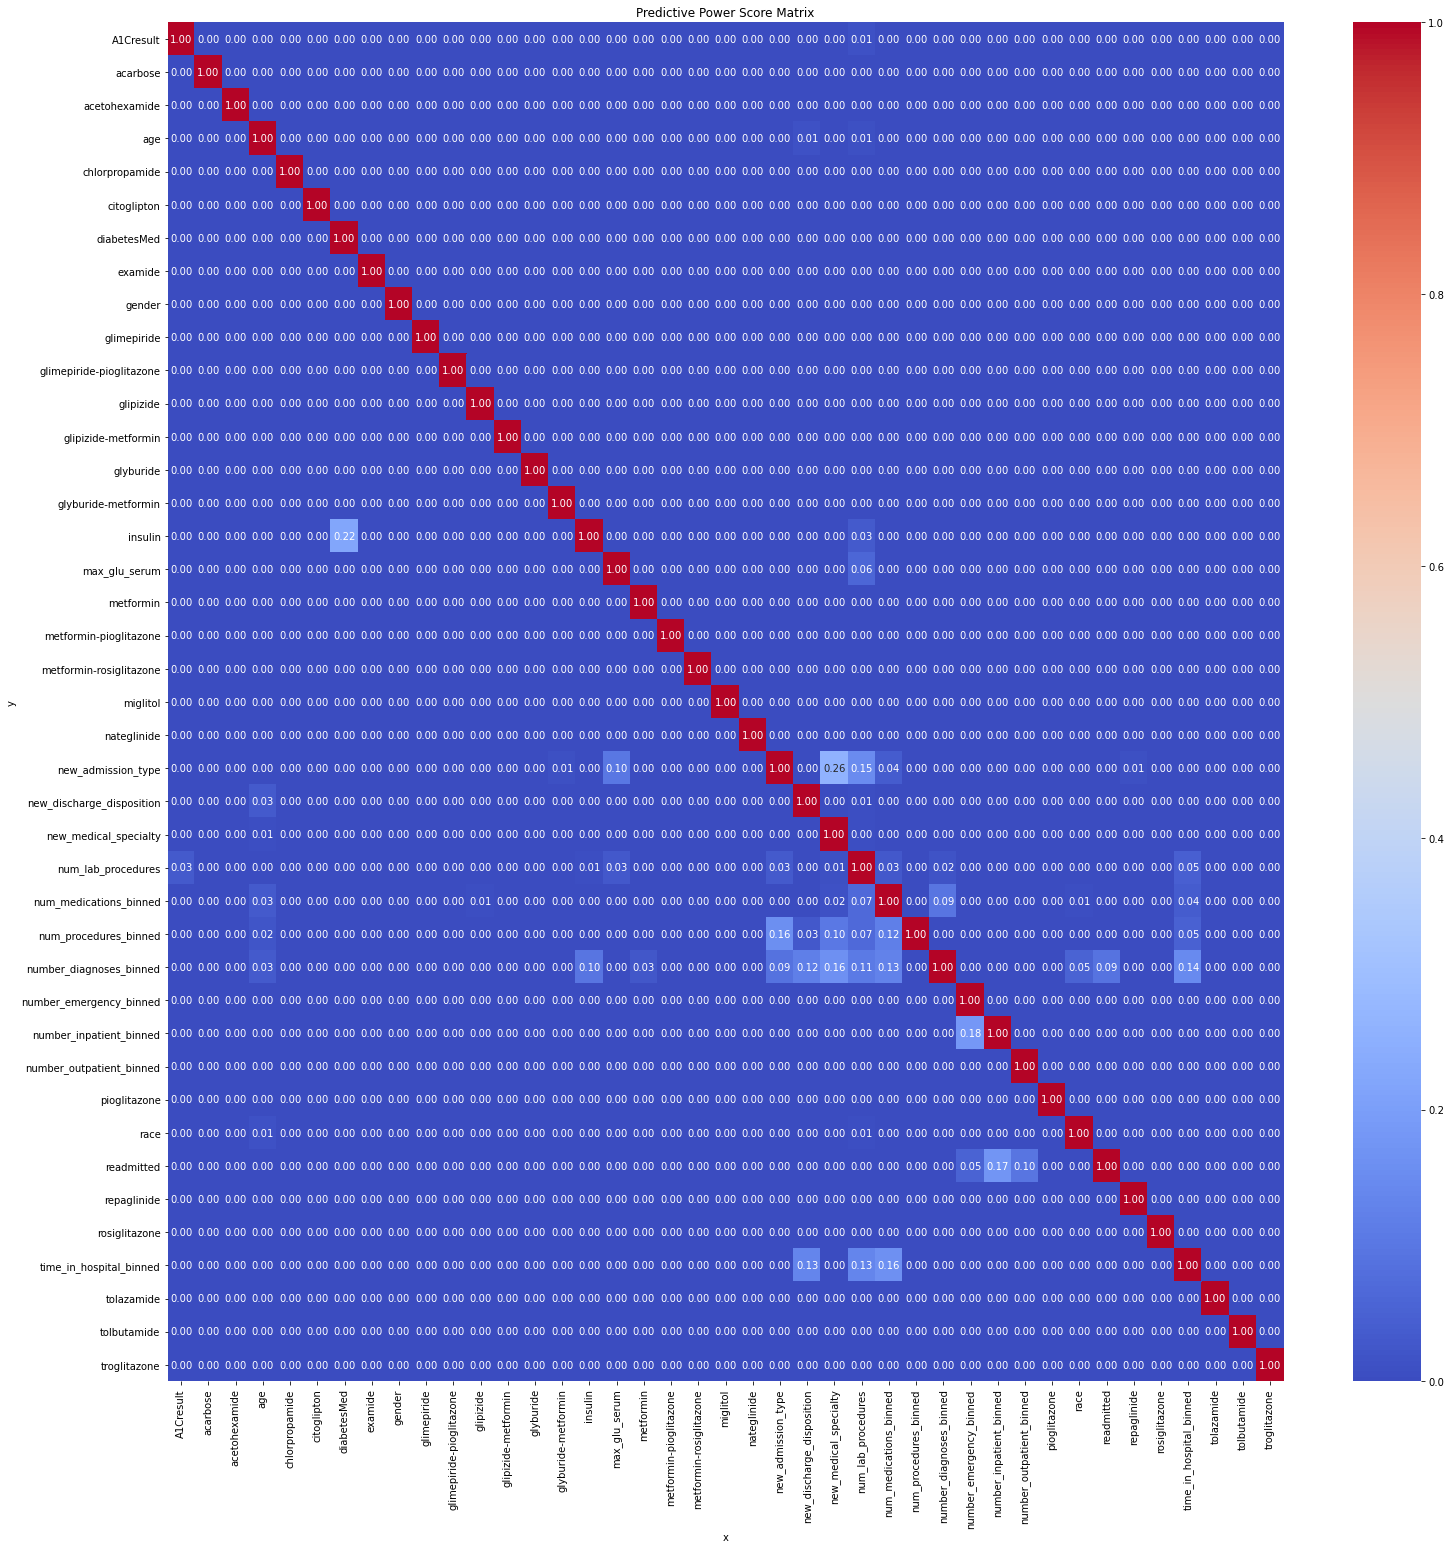

In [56]:
# Plot
plt.figure(figsize=(25, 25))
matrix_df = pps.matrix(diabetic_df_copy1).pivot(columns='x', index='y',  values='ppscore')
sns.heatmap(matrix_df, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Predictive Power Score Matrix");

In [57]:
diabetic_df_copy1.shape

(100241, 41)

In [58]:
# save the data to a new csv file
diabetic_df_copy1.to_csv('../data/diabetic_data_preprocessed.csv', index=False)